<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Convolutional_neural_network_with_Keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a digits classification problem- Convolutional neural network with Keras

Author: Davor Jordačević

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
import itertools
import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import adam
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import model_from_json
from keras.utils import plot_model
from __future__ import print_function
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")
K.set_image_data_format('channels_last')
np.random.seed(0)

Using TensorFlow backend.


# 1. Load the digit dataset

### 1.1 Spliting data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 1.2 Checking the shape of the input data

In [4]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


### 1.3 Plot first 64 digits

Now we can plot some digits to see how they look.

digits.target contain real value for each image in digits.images

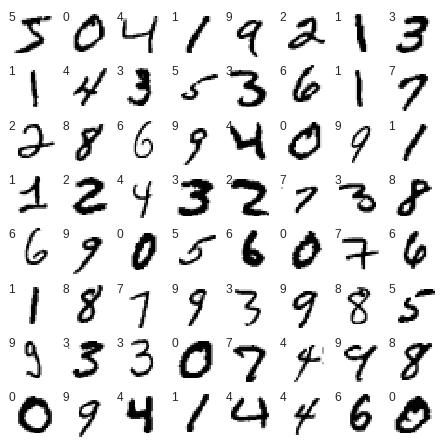

In [5]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [6]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


### 1.4 One Hot Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form.

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 10 # Total number of training epochs
learning_rate = 0.03 # The learning rate

### 2.2 Creating a model

**Conv2D**  - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

**BatchNormalization** - Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

**Max pooling** is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

**Dropout**  is a technique used to improve over-fit on neural networks, you should use Dropout along with other techniques like L2 Regularization. Basically during training some of neurons on a particular layer will be deactivated. This improve generalization because force your layer to learn with different neurons the same "concept".
During the prediction phase the dropout is deactivated.

**Flatten**  - Flattens the input. Does not affect the batch size.

To make this work in keras we need to compile a model. An important choice to make is the loss function. We use the **categorical_crossentropy** loss because it measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

**Adadelta** is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done.

In [9]:
# create a model
def create_model():
  model = Sequential()
  
  model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',input_shape = (28,28,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # Compile a model
  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.adadelta(), metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)  

### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [10]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 128,
 validation_data = (X_test, y_test),
 verbose = 2
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.2311 - acc: 0.9297 - val_loss: 0.0393 - val_acc: 0.9872
Epoch 2/10
 - 8s - loss: 0.0723 - acc: 0.9783 - val_loss: 0.0339 - val_acc: 0.9902
Epoch 3/10
 - 9s - loss: 0.0531 - acc: 0.9842 - val_loss: 0.0344 - val_acc: 0.9899
Epoch 4/10
 - 8s - loss: 0.0438 - acc: 0.9875 - val_loss: 0.0274 - val_acc: 0.9926
Epoch 5/10
 - 9s - loss: 0.0384 - acc: 0.9886 - val_loss: 0.0215 - val_acc: 0.9941
Epoch 6/10
 - 9s - loss: 0.0328 - acc: 0.9903 - val_loss: 0.0218 - val_acc: 0.9934
Epoch 7/10
 - 9s - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0227 - val_acc: 0.9934
Epoch 8/10
 - 9s - loss: 0.0274 - acc: 0.9919 - val_loss: 0.0200 - val_acc: 0.9943
Epoch 9/10
 - 9s - loss: 0.0246 - acc: 0.9927 - val_loss: 0.0252 - val_acc: 0.9937
Epoch 10/10
 - 9s - loss: 0.0240 - acc: 0.9930 - val_loss: 0.0204 - val_acc: 0.9945


### 2.4 Test the model

Model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)

### 2.5 Accuracy

Test-Accuracy :

In [12]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_acc"])*100))

Test-Accuracy: 99.23%


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [13]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
60000/60000 [==============================] - 6s 102us/step
loss=0.0087, accuracy: 99.7517%
Evaluating on testing set...
10000/10000 [==============================] - 1s 105us/step
loss=0.0204, accuracy: 99.4500%


### 2.7 Summarize history for accuracy and loss


Maximum Loss : 0.2311
Minimum Loss : 0.0240
Loss difference : 0.2070


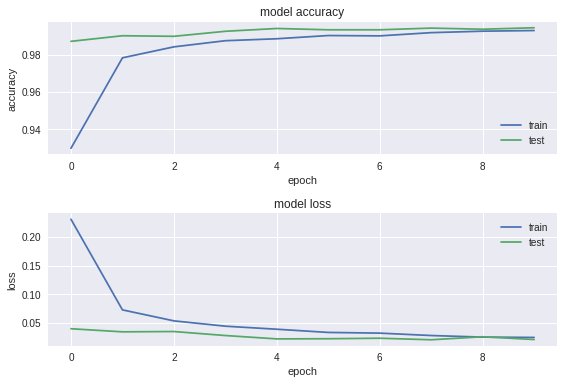

In [14]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

### 2.8 Confusion matrix

Text(0.5, 28.5, 'Predicted')

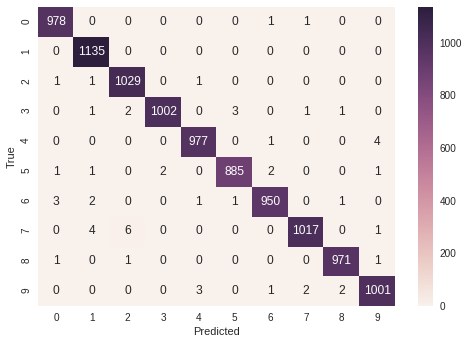

In [15]:
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, prediction_values) 
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

### 2.8 Save a model to JSON and HDF5

In [0]:
model_json = model.to_json()
with open("CNN_model_Keras_digits_recoginition.json", "w") as json_file:
    json_file.write(model_json)
# save weights to HDF5
model.save_weights("CNN_model_Keras_digits_recoginition.h5")

# 3. Visualization

### 3.3 Display the test set and predictions

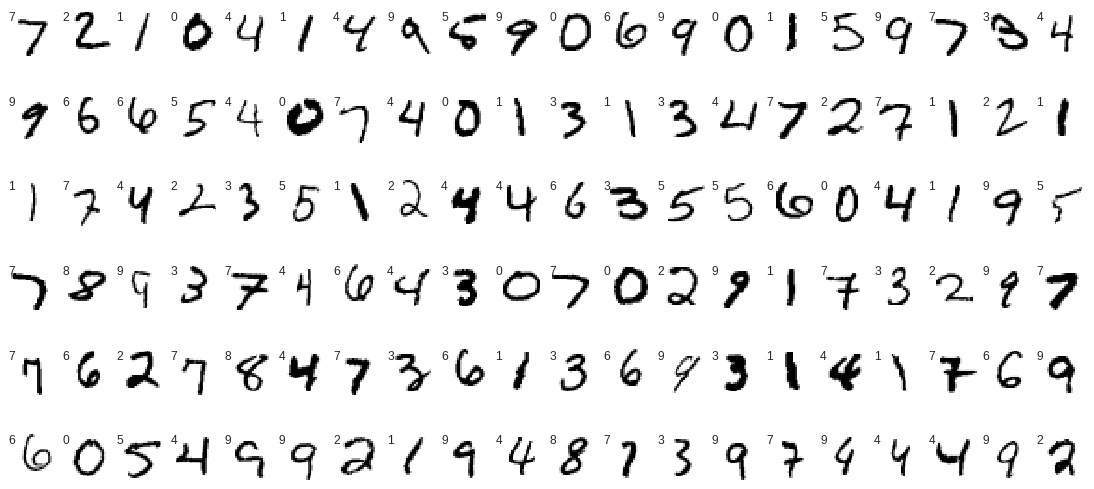

In [17]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i]))

# 4. Test our model

### 4.1 Import files

In google colab we can import files through the following commands:

In [0]:
#from google.colab import files
#files.upload()

### 4.2 Reshape pictures

Test out model on imported images:

In order to transfer the image to the grayscale, we will do the following:

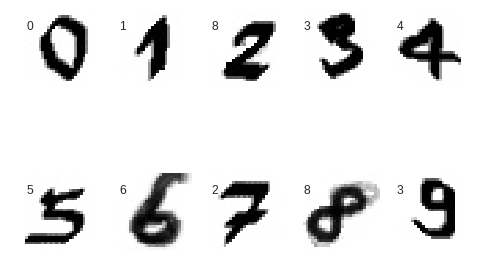

In [48]:
import cv2

for i in range(10):
  file  = 'number_'+str(i)+'.jpg'
  image = cv2.imread(file)
  grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image_n = cv2.bitwise_not(grayImage)
  image_n = image_n[:,:].reshape(1,28,28,1)
  image_n = image_n.astype('float32')
  image_n /= 255.
  predict = model.predict_classes(image_n)
  plt.subplot(2,5,i+1)
  plt.imshow(image_n.reshape(28,28))
  plt.text(0, 7, predict[0])
  plt.grid('off')
  plt.axis('off')

# 5. Save a model as picture

### 5.1 Save a model as png picture

In [0]:
plot_model(model,show_shapes=True,show_layer_names=False, to_file='model.png')

# 6. Activation Maps

In [0]:
# This should be executed every time when kernel is restarted
# Default colab settings, and versions of tensorflow,keras and keras-vis lead to a error
# This should be solved in newer versions

#!pip install git+https://github.com/raghakot/keras-vis.git -U

In [0]:
from matplotlib import cm
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
__________

### 6.1 Maximal Activations

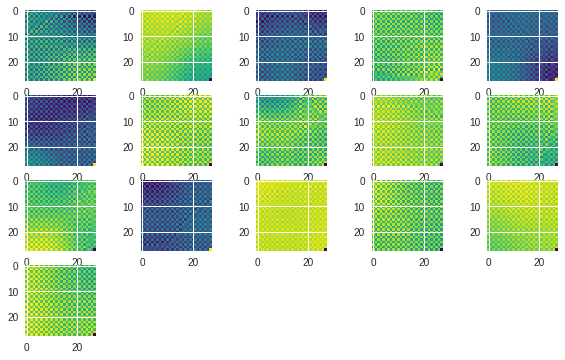

In [24]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'conv2d_1')
plt.figure(figsize=(10,6))
model = utils.apply_modifications(model)
for i in range(0,16):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 255.))
  plt.subplot(4,5,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

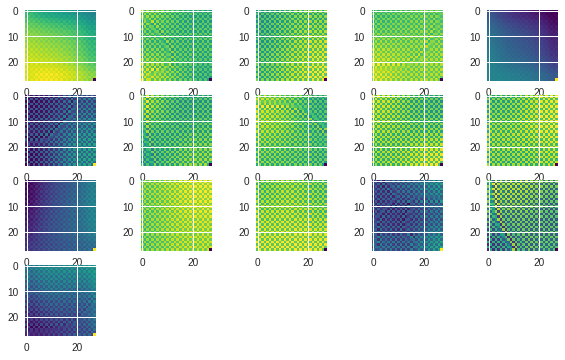

In [31]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'conv2d_2')
plt.figure(figsize=(10,6))
model = utils.apply_modifications(model)
for i in range(0,16):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 255.))
  plt.subplot(4,5,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

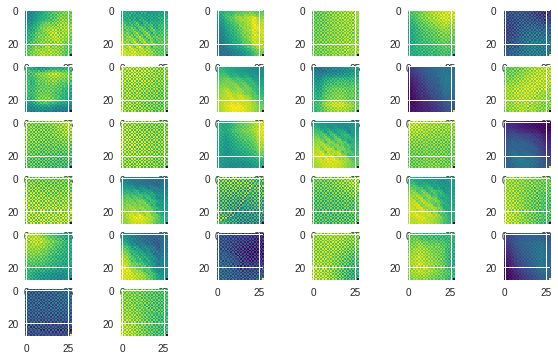

In [25]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'conv2d_3')
plt.figure(figsize=(10,6))
model = utils.apply_modifications(model)
for i in range(0,32):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 255.))
  plt.subplot(6,6,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

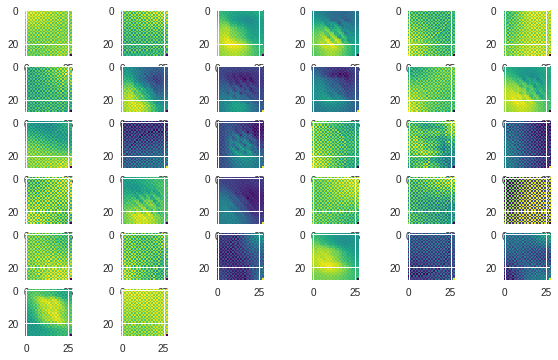

In [26]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'conv2d_4')
plt.figure(figsize=(10,6))
model = utils.apply_modifications(model)
for i in range(0,32):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 255.))
  plt.subplot(6,6,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

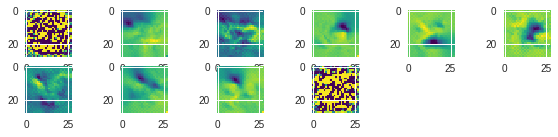

In [27]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_1')
plt.figure(figsize=(10,6))
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
for i in range(0,10):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
  plt.subplot(6,6,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

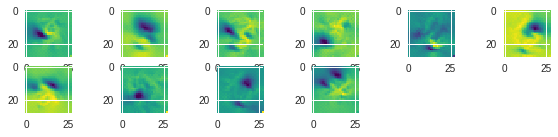

In [28]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_2')
plt.figure(figsize=(10,6))
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
for i in range(0,10):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
  plt.subplot(6,6,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

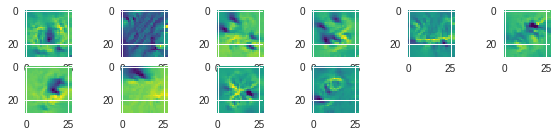

In [29]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_3')
plt.figure(figsize=(10,6))
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
for i in range(0,10):
# This is the output node we want to maximize.
  filter_idx = i
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
  plt.subplot(6,6,i+1)
  plt.imshow(img[..., 0],cmap=cm.viridis)

# 7. Visualize filters

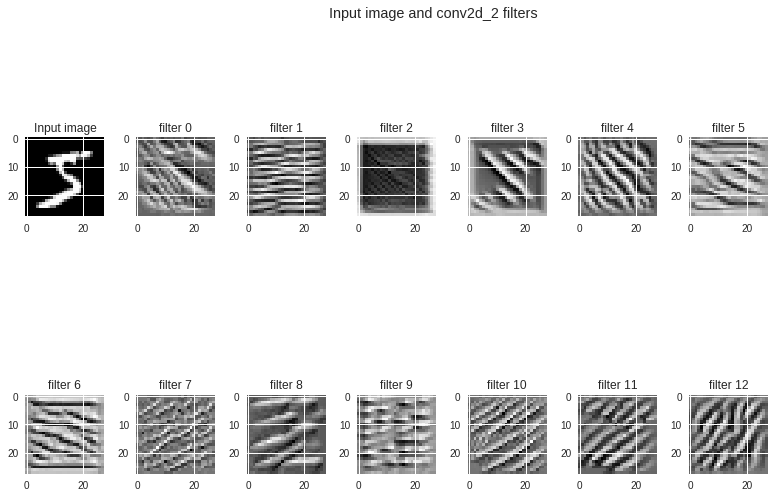

In [30]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 7
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 8))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
          continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
vis_img_in_filter()

# 8. Saliency maps

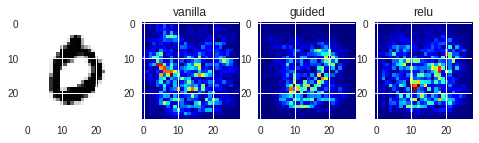

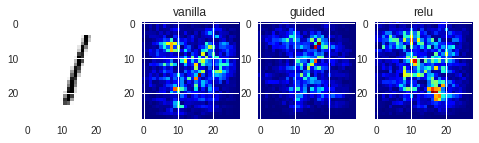

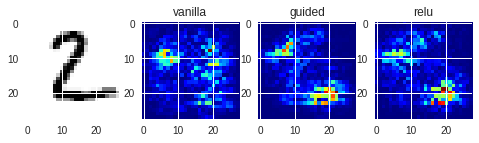

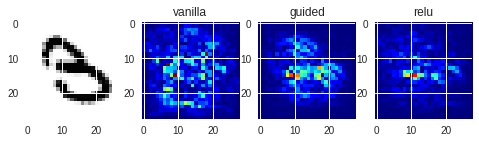

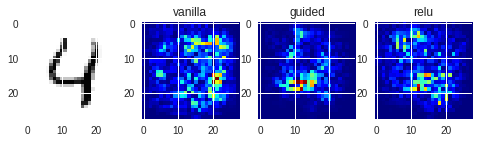

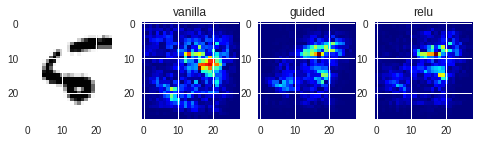

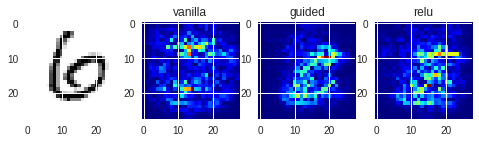

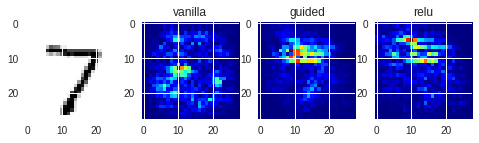

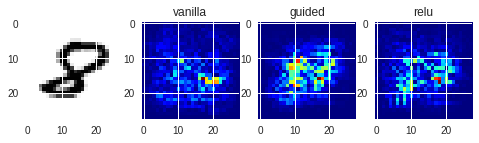

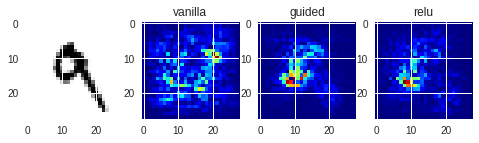

In [46]:
from vis.visualization import visualize_saliency

# This corresponds to the Dense linear layer.
for class_idx in np.arange(10):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]
    layer_idx = -1
    f, ax = plt.subplots(1, 4)
    ax[0].imshow(X_test[idx][..., 0])
    
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
                                   seed_input=X_test[idx], backprop_modifier=modifier)
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)    
        ax[i+1].imshow(grads, cmap='jet')

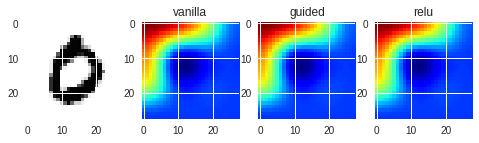

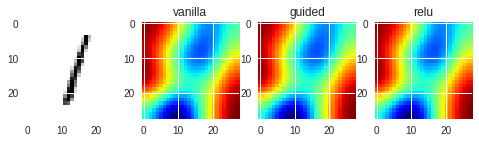

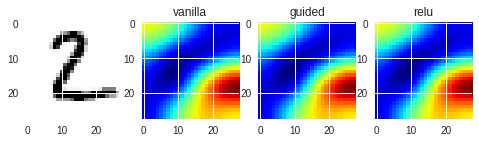

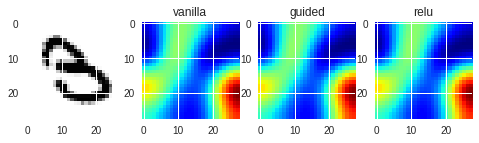

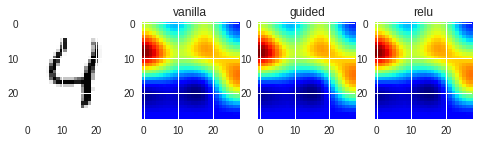

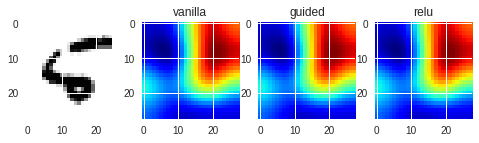

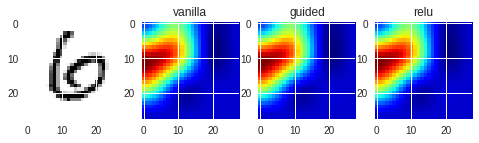

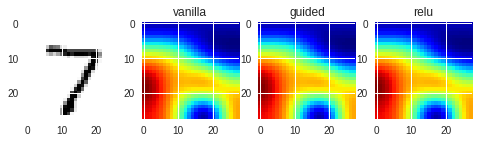

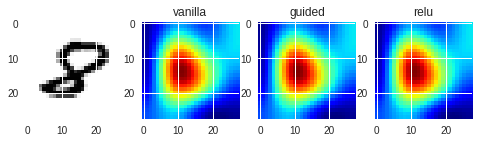

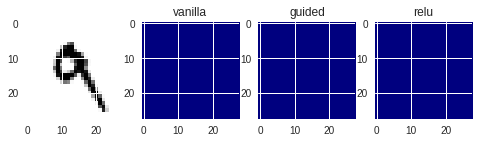

In [49]:
from vis.visualization import visualize_cam

# This corresponds to the Dense linear layer.
for class_idx in np.arange(10):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]
    layer_idx = -1
    f, ax = plt.subplots(1, 4)
    ax[0].imshow(X_test[idx][..., 0])
    
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_cam(model, layer_idx, filter_indices=class_idx, 
                              seed_input=X_test[idx], backprop_modifier=modifier)        
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)    
        ax[i+1].imshow(grads, cmap='jet')



---



---

For more informations, visit http://datahacker.rs/ .

For more examples, visit https://github.com/DavorJordacevic.


---



---

Refrences  : 

*   http://datahacker.rs/
*   https://keras.io
*   https://scikit-learn.org/stable/
*   https://computersciencewiki.org
*   https://github.com/raghakot/keras-vis

---



---
